# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

In [1]:
# # this first line is just used to make the plots appear nicely in the notebook
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# def fake_function(n):
#     time.sleep(0.001*n*n)
    
# def timeit(n):
#     start = time.time()
#     fake_function(n)
#     end = time.time()
#     return end-start
    
# N = [0, 10, 20, 30, 40, 50]
# T = [timeit(n) for n in N]
# plt.plot(N, T)
# plt.xlabel('n')
# plt.ylabel('Time (s)');

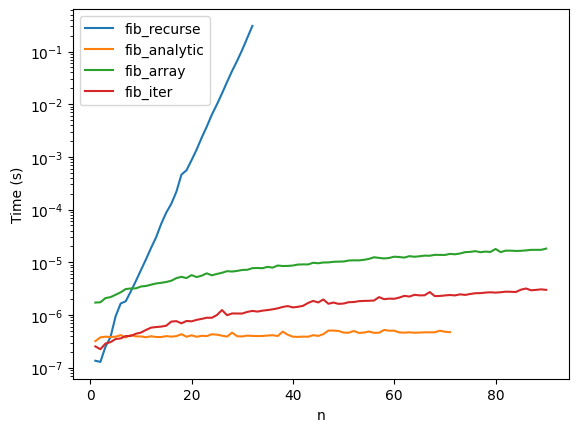

In [2]:
import math
import numpy

def fib_recurse(n):
    if n<=2:
        return 1
    else:
        return fib_recurse(n-1)+fib_recurse(n-2)
    
def fib_analytic(n):
    phi = (1+5**.5)/2
    return int((phi**n-(1-phi)**n)/5**.5)

def fib_array(n):
    f = numpy.ones(n+1, dtype=numpy.int64) 
    # Python numpy. ones() function returns a new array of given shape and data type, where the element's value is set to 1. This function is very similar to numpy zeros() function.
    for i in range(3, n+1):
        f[i] = f[i-1]+f[i-2]
    return f[n]

def fib_iter(n):
    a = b = 1
    for i in range(3, n+1):
        a, b = b, a+b
    return b





import matplotlib.pyplot as plt
import time

def timer(func, n, until=.1):
    start_time = time.time()
    repeats = 0
    while time.time()-start_time<until:
        func(n)
        repeats += 1
    return (time.time()-start_time)/repeats

for f, Nmax in [(fib_recurse, 32),
                (fib_analytic, 71),
                (fib_array, 90),
                (fib_iter, 90)]:
                # (fib_matrix, 90)]:
    N = list(range(1, Nmax+1))
    plt.semilogy(N, list(map(lambda n: timer(f, n), N)), label=f.__name__);
plt.ylabel('Time (s)')
plt.xlabel('n')
plt.legend(loc='upper left');

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```